In [1]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
#from pandas_profiling import ProfileReport
import math
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [34]:
data =pd.read_csv("D:\\Research Related Work\\large Dataset\\large dataset\\Xray disease\\Clahe\\ImageJ Image\\fsease.csv")

In [35]:
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Class
0,0,0.498306,1.184565,0.859768,1.777397,-1.488198,-1.701777,-0.066962,-0.478956,-2.387278,...,-0.023341,-2.114052,-1.768015,-0.243662,-1.035860,-2.248071,-0.357047,-0.048758,-1.834274,0
1,1,1.053067,1.240093,-0.531975,-0.066912,0.462762,0.674869,-0.707670,-0.267720,1.154837,...,0.935442,1.487858,1.475205,0.863441,2.169918,-0.092069,-0.436891,-0.750583,0.198253,0
2,2,-0.308246,-0.492897,-1.352053,0.487297,-0.185651,0.450737,-1.444691,-0.757765,1.278472,...,-1.234731,-0.649357,0.377662,-1.951955,0.383684,0.363241,1.277329,1.080208,-1.519878,0
3,3,-0.640516,0.557161,1.410293,-0.557892,-0.456329,0.306950,-0.031877,0.676670,-1.745771,...,-0.318133,-0.763026,1.140925,-0.096940,-0.418341,-0.044510,0.147787,-0.600118,0.954540,0
4,4,0.089688,-0.559928,1.265774,-0.056648,0.222617,0.492710,0.621892,0.347846,-0.398718,...,0.084652,0.449789,-2.203195,-0.212500,-1.221813,-0.642644,0.078940,-0.119986,1.089037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,6995,-0.856657,-0.631813,0.457466,0.559961,-0.630617,0.257753,-0.942082,-0.169938,-0.576757,...,-1.120890,-0.156766,0.200261,-0.684295,-0.004430,0.287504,0.457445,1.520493,0.866020,4
34996,6996,0.634847,-0.854351,-0.804581,-1.072778,-0.213553,-0.368705,0.492512,0.471055,-0.075037,...,1.177741,0.322238,0.489683,-0.559731,0.205659,-0.465483,-0.011579,0.676952,0.296163,4
34997,6997,1.128597,-0.361012,-0.783604,0.322469,0.751470,-0.394386,0.742436,0.129560,-0.274527,...,0.064871,0.660119,-0.318686,-0.748940,0.709906,-0.486550,-0.442206,-0.096521,-0.536540,4
34998,6998,-1.403212,2.190670,-0.192638,-1.166953,-1.290819,-0.095539,-1.463196,-2.082999,1.091117,...,-1.907479,-1.337082,1.744153,1.343280,-2.177645,2.685775,1.197145,1.222838,1.787307,4


In [36]:
data=data.drop(['Unnamed: 0'],axis=1)

In [37]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Class
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.000000,...,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,0.000034,0.000001,-0.000062,0.000028,-0.000003,-5.182603e-07,0.000007,0.000025,0.000019,-0.000026,...,-0.000059,0.000034,-0.000041,-0.000015,-0.000076,-0.000048,-0.000018,-0.000020,-0.000042,2.000000
std,1.000030,1.000021,1.000008,1.000036,1.000034,1.000028e+00,1.000041,1.000029,1.000038,1.000036,...,0.999903,0.999981,1.000007,1.000017,0.999989,1.000017,1.000019,1.000039,1.000026,1.414234
min,-4.311611,-4.639788,-4.277136,-4.248270,-3.874978,-4.311084e+00,-4.656941,-5.304754,-4.096604,-4.320120,...,-3.928205,-5.246035,-3.938106,-4.043261,-3.821147,-4.190718,-4.606447,-5.087631,-3.833256,0.000000
25%,-0.702965,-0.687683,-0.761611,-0.729440,-0.752548,-7.042038e-01,-0.707163,-0.705387,-0.755692,-0.701425,...,-0.719229,-0.700011,-0.725493,-0.744617,-0.729918,-0.722982,-0.728995,-0.700614,-0.750544,1.000000
50%,0.003574,-0.002896,-0.018791,-0.075544,-0.060311,-2.605452e-02,-0.049370,-0.011639,-0.022715,-0.020619,...,-0.017300,-0.014171,-0.012312,0.012094,-0.025644,0.031801,0.021043,0.002451,-0.020336,2.000000
75%,0.723015,0.675834,0.727232,0.704987,0.764212,7.056577e-01,0.694679,0.707947,0.744704,0.708916,...,0.714665,0.707861,0.732392,0.745683,0.761643,0.740861,0.737403,0.708682,0.729194,3.000000
max,5.402340,5.439762,4.490264,6.265875,4.264489,4.343505e+00,4.651555,4.575318,4.596425,4.133562,...,4.339803,4.136138,4.930480,4.114478,4.052169,4.198542,4.361160,4.395450,4.137706,4.000000


In [ ]:
data=data.drop(['Unnamed: 0'],axis=1)


In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Class
0,-1.238876,-1.162572,0.711839,-1.030022,1.004054,0.881030,-0.275769,1.171647,0.337119,-1.073479,...,-1.161538,0.688953,1.039501,0.282821,-1.080189,-1.077687,-0.589549,0.868813,0.551522,0
1,-1.229516,-1.129829,0.716186,-1.001224,1.108714,0.966345,-0.273352,1.142067,0.459743,-1.015808,...,-1.107314,0.406946,0.851892,0.357397,-1.090724,-1.006178,-0.473097,0.916110,0.598118,0
2,-0.998804,-1.003511,0.791770,-1.090677,1.004523,0.497615,0.410605,0.854505,0.285460,-1.130764,...,-1.151174,-0.338734,1.012379,-0.055816,-1.130907,-1.069801,-0.319376,0.882833,0.560543,0
3,-1.341136,-1.187470,0.766195,-1.056439,1.076676,0.713483,-0.199968,1.040346,0.513525,-1.151649,...,-1.200268,0.114112,1.168396,0.291335,-1.082893,-1.107605,-0.423569,0.848431,0.513580,0
4,0.800154,-0.273967,0.204064,0.037726,-0.491318,-0.532842,-0.342399,0.086747,0.714713,0.350965,...,0.403660,0.081063,-0.543451,0.850288,0.430287,0.115098,-0.845838,0.561743,1.165519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,-0.284491,1.267109,0.156435,0.260306,-1.187949,-1.015016,-1.269842,1.404110,0.913930,-0.975070,...,-1.309548,-2.265377,1.371575,-0.014773,0.833468,1.427988,-0.841032,0.275702,-0.090761,1
3293,1.117308,-0.887638,1.681930,0.817732,0.017086,-0.597410,-0.212606,1.196792,0.144709,0.521641,...,-1.156939,0.606553,1.209836,0.298432,0.586399,1.605239,0.045295,0.029557,1.128098,1
3294,0.393950,0.682695,0.561957,0.520209,0.617344,-0.095359,0.192856,-0.383711,0.165051,0.955579,...,-0.473454,0.301106,0.099670,0.635417,-0.501460,0.051790,0.704589,-0.208800,-0.098873,1
3295,0.519622,-1.615315,-0.282179,-0.988043,-0.521970,-0.413131,0.243928,0.314821,-1.723979,0.374074,...,0.319642,1.383686,0.623091,0.111022,1.058832,0.970517,0.354674,-0.344511,1.596337,1


In [ ]:
#profile = ProfileReport(data)

In [45]:
#profile

In [38]:
data.isnull().sum().sort_values(ascending=False).head(100)

0     0
64    0
74    0
73    0
72    0
     ..
32    0
31    0
30    0
29    0
28    0
Length: 100, dtype: int64

In [39]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(10)

,Total,Percent
0,0,0.0
64,0,0.0
74,0,0.0
73,0,0.0
72,0,0.0
71,0,0.0
70,0,0.0
69,0,0.0
68,0,0.0
67,0,0.0


In [40]:
data=data.fillna(method='ffill')

In [41]:
data.isnull().sum().sort_values(ascending=False).head(10)

0     0
64    0
74    0
73    0
72    0
71    0
70    0
69    0
68    0
67    0
dtype: int64

In [42]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '91', '92', '93', '94', '95', '96', '97', '98', '99', 'Class'],
      dtype='object', length=101)

In [43]:
#data=data.drop(['Sl. No'],axis=1)


In [44]:
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Class
0,0.498306,1.184565,0.859768,1.777397,-1.488198,-1.701777,-0.066962,-0.478956,-2.387278,1.359644,...,-0.023341,-2.114052,-1.768015,-0.243662,-1.035860,-2.248071,-0.357047,-0.048758,-1.834274,0
1,1.053067,1.240093,-0.531975,-0.066912,0.462762,0.674869,-0.707670,-0.267720,1.154837,0.582456,...,0.935442,1.487858,1.475205,0.863441,2.169918,-0.092069,-0.436891,-0.750583,0.198253,0
2,-0.308246,-0.492897,-1.352053,0.487297,-0.185651,0.450737,-1.444691,-0.757765,1.278472,-0.650815,...,-1.234731,-0.649357,0.377662,-1.951955,0.383684,0.363241,1.277329,1.080208,-1.519878,0
3,-0.640516,0.557161,1.410293,-0.557892,-0.456329,0.306950,-0.031877,0.676670,-1.745771,0.351660,...,-0.318133,-0.763026,1.140925,-0.096940,-0.418341,-0.044510,0.147787,-0.600118,0.954540,0
4,0.089688,-0.559928,1.265774,-0.056648,0.222617,0.492710,0.621892,0.347846,-0.398718,0.343433,...,0.084652,0.449789,-2.203195,-0.212500,-1.221813,-0.642644,0.078940,-0.119986,1.089037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,-0.856657,-0.631813,0.457466,0.559961,-0.630617,0.257753,-0.942082,-0.169938,-0.576757,-0.082486,...,-1.120890,-0.156766,0.200261,-0.684295,-0.004430,0.287504,0.457445,1.520493,0.866020,4
34996,0.634847,-0.854351,-0.804581,-1.072778,-0.213553,-0.368705,0.492512,0.471055,-0.075037,-0.971382,...,1.177741,0.322238,0.489683,-0.559731,0.205659,-0.465483,-0.011579,0.676952,0.296163,4
34997,1.128597,-0.361012,-0.783604,0.322469,0.751470,-0.394386,0.742436,0.129560,-0.274527,-0.131906,...,0.064871,0.660119,-0.318686,-0.748940,0.709906,-0.486550,-0.442206,-0.096521,-0.536540,4
34998,-1.403212,2.190670,-0.192638,-1.166953,-1.290819,-0.095539,-1.463196,-2.082999,1.091117,1.274391,...,-1.907479,-1.337082,1.744153,1.343280,-2.177645,2.685775,1.197145,1.222838,1.787307,4


In [45]:
data.shape

(35000, 101)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Columns: 101 entries, 0 to Class
dtypes: float64(100), int64(1)
memory usage: 27.0 MB


In [47]:
#data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
#data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [48]:
data.shape

(35000, 101)

In [49]:
corrmat = data.corr()

corrmat['Class'].sort_values(ascending=False) #How all the features correlate with the PCOS 


Class    1.000000
55       0.000130
85       0.000115
29       0.000111
95       0.000108
           ...   
80      -0.000089
11      -0.000120
19      -0.000123
46      -0.000141
77      -0.000155
Name: Class, Length: 101, dtype: float64

In [50]:
#plt.figure(figsize=(60,30))
#sns.heatmap(corrmat,annot=True,cmap='coolwarm')

Model Building 

In [51]:
y= data['Class']
X= data.drop('Class', axis=1)


In [52]:
X.isnull().sum().sort_values(ascending=False)

0     0
63    0
73    0
72    0
71    0
     ..
30    0
29    0
28    0
27    0
99    0
Length: 100, dtype: int64

In [53]:
X=X.fillna(method='ffill')

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,y, test_size=0.30,random_state=10)
new_feature=X_test
new_target=y_test
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=25)

In [56]:
from sklearn.preprocessing import StandardScaler
# Scaling features between -1 and 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [57]:

from sklearn.metrics import classification_report,confusion_matrix

# K Fold Cross Validation 

In [58]:
from sklearn.model_selection import cross_val_score


In [59]:
cv_score=cross_val_score(tr,X,y,cv=10)

In [60]:
cv_score

# Naive_Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [62]:
pred = gnb.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 520  195  104  264 1021]
 [ 158  550   17  257 1161]
 [ 130  124  183  406 1267]
 [  98  251   55  691 1001]
 [ 375  174  180  122 1196]]
              precision    recall  f1-score   support

           0       0.41      0.25      0.31      2104
           1       0.43      0.26      0.32      2143
           2       0.34      0.09      0.14      2110
           3       0.40      0.33      0.36      2096
           4       0.21      0.58      0.31      2047

    accuracy                           0.30     10500
   macro avg       0.36      0.30      0.29     10500
weighted avg       0.36      0.30      0.29     10500



In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
# Scaling features between -1 and 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Model:  Logistic Regression
Validation Accuracy:  0.27171428571428574
Training Accuracy:  0.3271428571428571


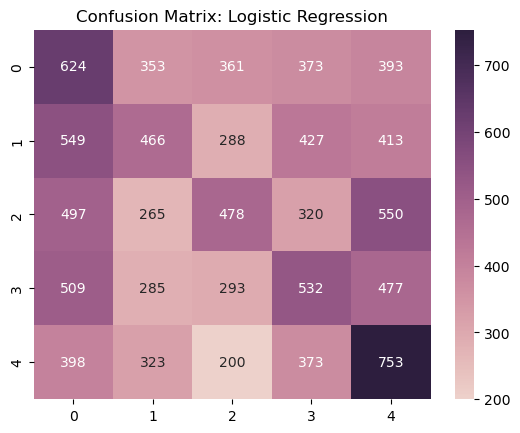

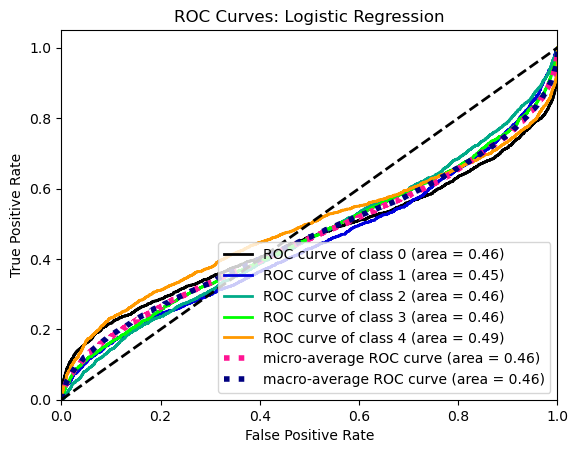

Model:  Decision Tree Classifier
Validation Accuracy:  0.9127619047619048
Training Accuracy:  1.0


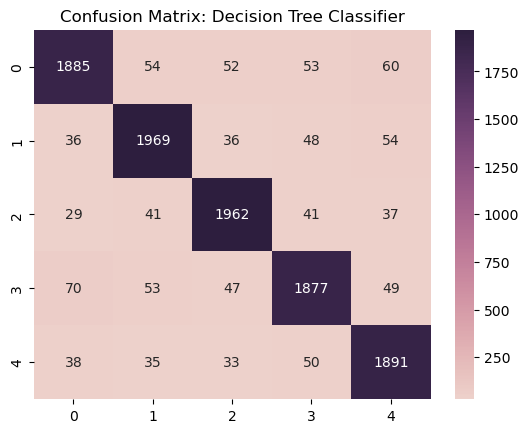

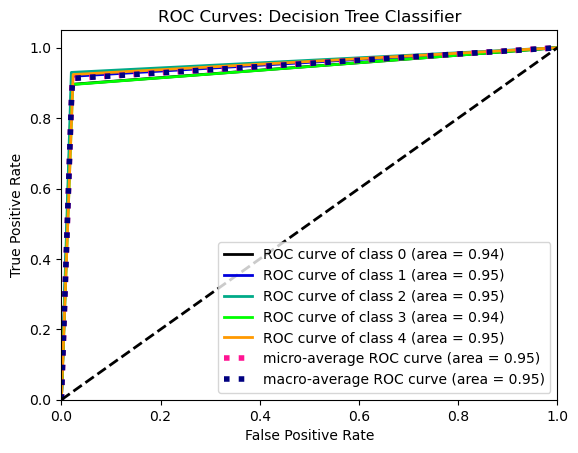

Model:  Random Forest
Validation Accuracy:  0.9978095238095238
Training Accuracy:  1.0


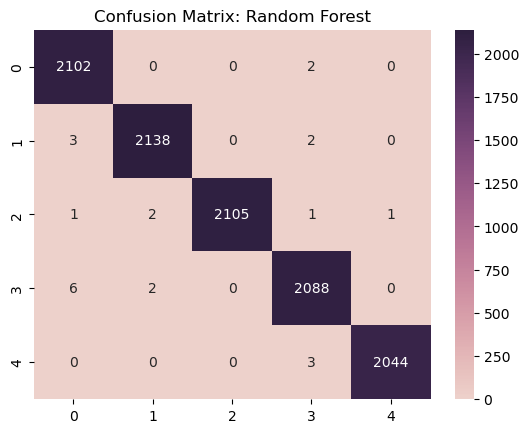

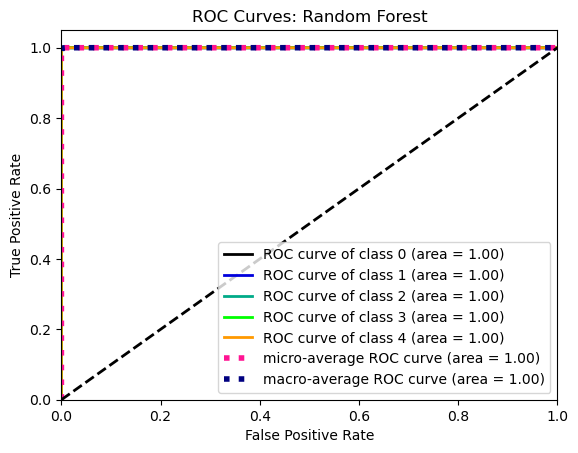

Model:  Linear Discriminant Analyzer
Validation Accuracy:  0.2722857142857143
Training Accuracy:  0.32640816326530614


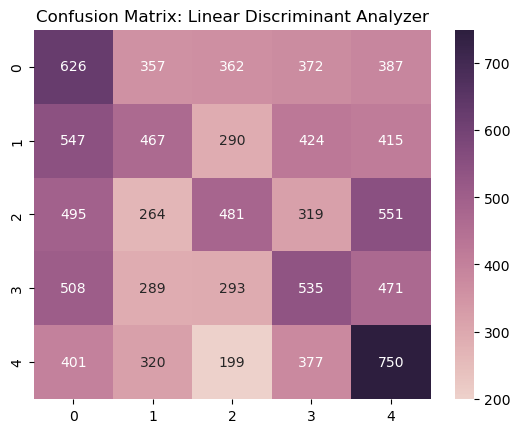

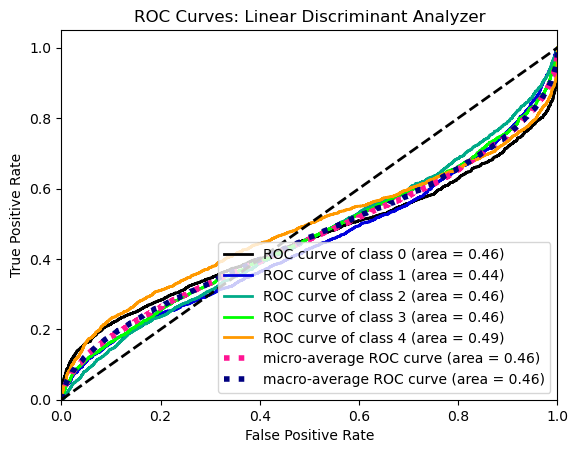

Model:  Ada Boost
Validation Accuracy:  0.34914285714285714
Training Accuracy:  0.36514285714285716


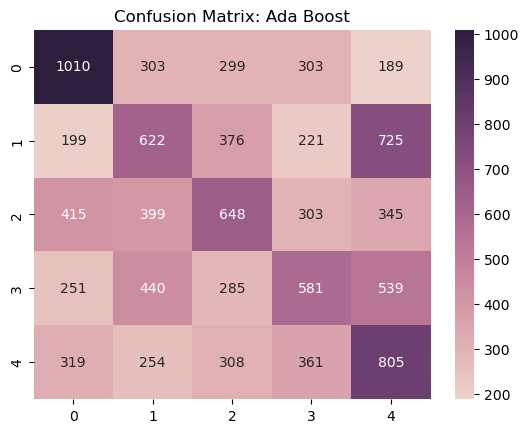

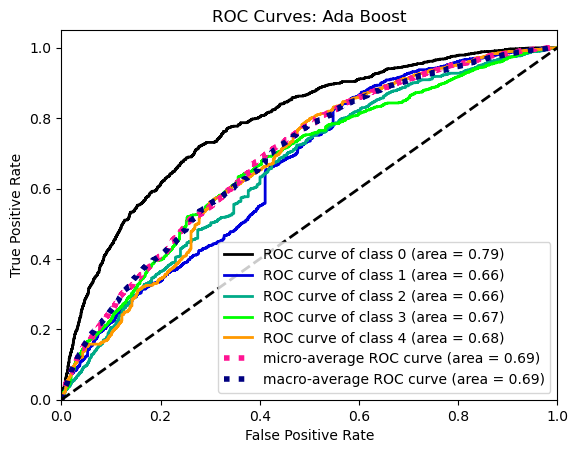

Model:  XGBClassifier
Validation Accuracy:  0.9990476190476191
Training Accuracy:  1.0


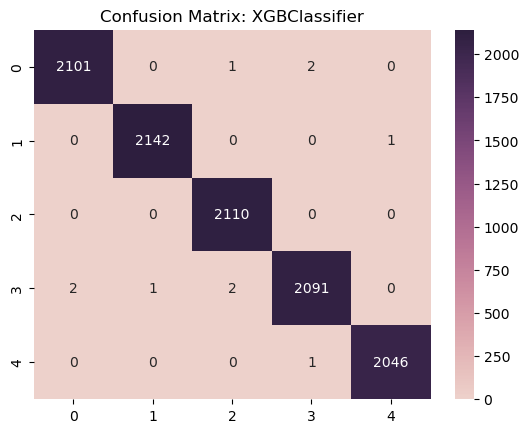

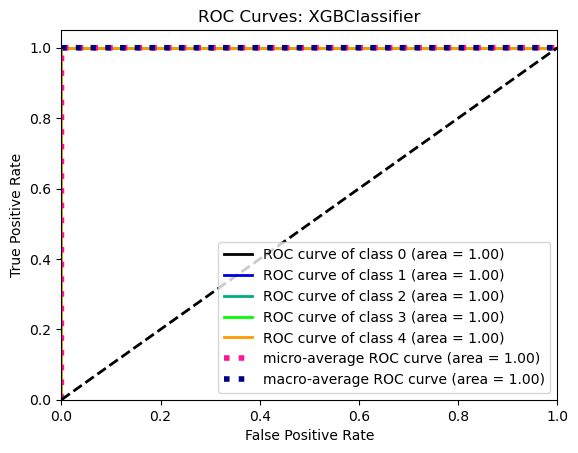

In [65]:
# Models to be used for ML
models = [('Logistic Regression', LogisticRegression()),
          ('Decision Tree Classifier', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Linear Discriminant Analyzer', LinearDiscriminantAnalysis()),
          ('Ada Boost', AdaBoostClassifier()),
          ('XGBClassifier',XGBClassifier())
          #('SVC',SVC()
          
         
          ]

models_score = []
for name, model in models:
    model = model #Model Object create
    model.fit(X_train, y_train)
    model.predict(X_test)
    models_score.append([name, accuracy_score(y_test, model.predict(X_test))])
    
    print("Model: ",name)
    print('Validation Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
    print('Training Accuracy: ', accuracy_score(y_train, model.predict(X_train)))
    
    plt.figure()
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    plt.title('Confusion Matrix: {}'.format(name))
    sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
    plt.show()
    
    import scikitplot as skplt

    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
    plt.title('ROC Curves: {}'.format(name))
    plt.show()